# IMPORTING THE DATA

In [13]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# DROPPING THE NULL VALUES

In [14]:
data = data.dropna()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
df = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1


# ENCODING THE NON NUMERICAL COLUMNS

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(data['gender'])
df['ever_married'] = le.fit_transform(data['ever_married'])
df['work_type'] = le.fit_transform(data['work_type'])
df['Residence_type'] = le.fit_transform(data['Residence_type'])
df['smoking_status'] = le.fit_transform(data['smoking_status'])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2
5,81.0,0,0,186.21,29.0,1,1,1,2,1,1


In [17]:
data.shape,df.shape

((4909, 12), (4909, 11))

In [18]:
y = df['stroke']
x = df.drop('stroke',axis=1)
x.shape,y.shape

((4909, 10), (4909,))

# PLOTTING THE COUNTS OF STROKE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'COUNT PLOT')

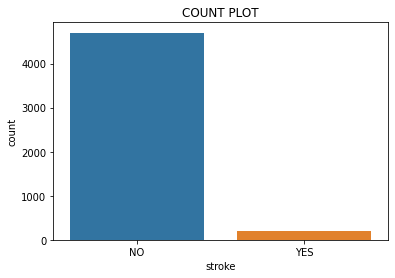

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y)
plt.xticks([0,1],['NO','YES'])
plt.title('COUNT PLOT')

# SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [20]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2)

# CREATING ARTIFICIAL NEURAL NETWORK MODEL[ANN]

In [21]:
import tensorflow as tf

In [22]:
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units=25,activation='relu'))
ann.add(tf.keras.layers.Dense(units=25,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile('adam','binary_crossentropy',metrics=['accuracy'])

# TRAINING ANN MODEL

In [23]:
result = ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
123/123 [==============================] - 2s 4ms/step - loss: 0.2428 - accuracy: 0.9567
Epoch 2/10
123/123 [==============================] - 1s 4ms/step - loss: 0.1875 - accuracy: 0.9575
Epoch 3/10
123/123 [==============================] - 1s 6ms/step - loss: 0.1772 - accuracy: 0.9559
Epoch 4/10
123/123 [==============================] - 1s 7ms/step - loss: 0.1697 - accuracy: 0.9580
Epoch 5/10
123/123 [==============================] - 1s 5ms/step - loss: 0.1714 - accuracy: 0.9567
Epoch 6/10
123/123 [==============================] - 1s 4ms/step - loss: 0.1631 - accuracy: 0.9554
Epoch 7/10
123/123 [==============================] - 0s 4ms/step - loss: 0.1682 - accuracy: 0.9562
Epoch 8/10
123/123 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.9554
Epoch 9/10
123/123 [==============================] - 0s 4ms/step - loss: 0.1632 - accuracy: 0.9559
Epoch 10/10
123/123 [==============================] - 1s 5ms/step - loss: 0.1662 - accuracy: 0.9575

# CREATING CONFUSION MATRIX FOR THE ACTUAL AND PREDICTED VALUE

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = []
for i in ann.predict(x_test):
    if i>0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)
confusion_matrix(y_test,y_pred)

array([[936,   0],
       [ 46,   0]])

# ACCURACY SCORE FOR TESTING DATA

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9531568228105907